In [1]:
import sys
import os
from icecream import ic

from pathlib import Path

import utils_behavior

from utils_behavior import Ballpushing_utils
from utils_behavior import Utils
from utils_behavior import Processing
from utils_behavior import HoloviewsTemplates

import pandas as pd
import numpy as np


# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
import pandas as pd
#import pyarrow.feather as feather

import pandas as pd
import numpy as np



import matplotlib.pyplot as plt
import seaborn as sns

import importlib



Loading BallPushing utils version 20 Jan 2025


In [2]:
# Get the path to the data

Datapath = Utils.get_data_path()

In [3]:
# Find folders with "Learning or learning" in the name as a list

folders = [f for f in Datapath.glob("*FeedingState*")]

folders

[PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240718_Afternoon_FeedingState_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_PM_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240718_Afternoon_FeedingState_next_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230705_FeedingState_2_AM_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230706_FeedingState_3_PM_Flipped_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230725_FeedingState_PM_Dark_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230727_FeedingState_PM_Dark_Flip_Videos_Tracked'),
 PosixPath('/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230705_FeedingState_2_PM_Videos_Tracked')]

In [ ]:
# Take the first 

exp = Ballpushing_utils.Experiment(folders[0])

Config loaded with the following parameters:
time_range: None
success_cutoff: False
success_cutoff_method: final_event
tracks_smoothing: True
downsampling_factor: None
interaction_threshold: (0, 45)
gap_between_events: 1
events_min_length: 1
dead_threshold: 30
adjusted_events_normalisation: 1000
significant_threshold: 5
aha_moment_threshold: 20
success_direction_threshold: 25
final_event_threshold: 170
final_event_F1_threshold: 100
max_event_threshold: 10
template_width: 96
template_height: 516
padding: 20
y_crop: (74, 0)
contact_threshold: (0, 13)
gap_between_contacts: 0.5
contact_min_length: 0.5
skeleton_tracks_smoothing: False
hidden_value: -1


Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor5
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor1
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor4
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor2
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor6
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena2/corridor3
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena7/corridor5
Loading fly from /mnt/upramdya_data/MD/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked/arena7/corridor1
Loading fly from /mnt/upramdya_d

In [ ]:
exp

In [ ]:
Dataset = Ballpushing_utils.Dataset(exp)

Config loaded with the following parameters:
time_range: None
success_cutoff: False
success_cutoff_method: final_event
tracks_smoothing: True
downsampling_factor: None
interaction_threshold: (0, 50)
gap_between_events: 2
events_min_length: 2
dead_threshold: 30
adjusted_events_normalisation: 1000
significant_threshold: 5
aha_moment_threshold: 20
success_direction_threshold: 25
final_event_threshold: 170
final_event_F1_threshold: 100
max_event_threshold: 10
template_width: 96
template_height: 516
padding: 20
y_crop: (74, 0)
contact_threshold: (0, 13)
gap_between_contacts: 0.5
contact_min_length: 0.5
skeleton_tracks_smoothing: False
hidden_value: -1


In [ ]:
ball_data = Dataset.data

In [ ]:
ball_data

index         time   frame  adjusted_time   x_fly_0    y_fly_0  \
0              0     0.033333       1            NaN  0.000000   0.000000   
1              1     0.066667       2            NaN -0.000004  -0.000222   
2              2     0.100000       3            NaN -0.000008  -0.000443   
3              3     0.133333       4            NaN -0.000012  -0.000665   
4              4     0.166667       5            NaN -0.000016  -0.000887   
...          ...          ...     ...            ...       ...        ...   
11447995  215995  7199.866667  215996            NaN  2.730407  11.766008   
11447996  215996  7199.900000  215997            NaN  2.755272  12.000334   
11447997  215997  7199.933333  215998            NaN  2.780138  12.234659   
11447998  215998  7199.966667  215999            NaN  2.805004  12.468984   
11447999  215999  7200.000000  216000            NaN  2.829869  12.703309   

          distance_fly_0  x_ball_0    y_ball_0  distance_ball_0  ...  \
0               0.000000  2.359147 -153.263031         0.000000  ...   
1               0.000222  2.359172 -153.263020         0.000028  ...   
2               0.000443  2.359198 -153.263010         0.000056  ...   
3               0.000665  2.359224 -153.262999         0.000084  ...   
4               0.000887  2.359250 -153.262988         0.000112  ...   
...                  ...       ...         ...              ...  ...   
11447995       12.078662 -6.928074 -193.418032        28.017019  ...   
11447996       12.312576 -6.928002 -193.417919        28.016897  ...   
11447997       12.546555 -6.927929 -193.417807        28.016775  ...   
11447998       12.780595 -6.927857 -193.417694        28.016653  ...   
11447999       13.014693 -6.927784 -193.417582        28.016531  ...   

          Nickname Brain region Simplified Nickname Split    Date Genotype  \
0               PR      Control                  PR     m  230704       PR   
1               PR      Control                  PR     m  230704       PR   
2               PR      Control                  PR     m  230704       PR   
3               PR      Control                  PR     m  230704       PR   
4               PR      Control                  PR     m  230704       PR   
...            ...          ...                 ...   ...     ...      ...   
11447995        PR      Control                  PR     m  230704       PR   
11447996        PR      Control                  PR     m  230704       PR   
11447997        PR      Control                  PR     m  230704       PR   
11447998        PR      Control                  PR     m  230704       PR   
11447999        PR      Control                  PR     m  230704       PR   

         Period     FeedingState Orientation Light  
0            AM  starved_noWater         std    on  
1            AM  starved_noWater         std    on  
2            AM  starved_noWater         std    on  
3            AM  starved_noWater         std    on  
4            AM  starved_noWater         std    on  
...         ...              ...         ...   ...  
11447995     AM              Fed         std    on  
11447996     AM              Fed         std    on  
11447997     AM              Fed         std    on  
11447998     AM              Fed         std    on  
11447999     AM              Fed         std    on  

[11448000 rows x 24 columns]

In [ ]:
# Now let's compute the euclidean distance between the fly and the ball during events

exfly = ball_data.loc[ball_data["fly"] == ball_data["fly"].unique()[0]]

In [ ]:
exfly["adjusted_frame"] = 0

In [ ]:
# for each event, compute the distance between the fly and the ball
for event in exfly["interaction_event"].unique():
    event_data = exfly.loc[exfly["interaction_event"] == event]
    event_data = event_data.sort_values("frame")
    event_data["distance"] = np.sqrt(
        (event_data["x_ball_0"] - event_data["x_fly_0"]) ** 2
        + (event_data["y_ball_0"] - event_data["y_fly_0"]) ** 2
    )
    
    # Add an "adjusted_frame" column that starts at 0 and goes up to the length of the event
    event_data["adjusted_frame"] = range(len(event_data))

    # Assign the computed columns back to the original DataFrame
    exfly.loc[exfly["interaction_event"] == event, "distance"] = event_data["distance"]
    exfly.loc[exfly["interaction_event"] == event, "adjusted_frame"] = event_data["adjusted_frame"]

print(exfly)

         index         time   frame  adjusted_time    x_fly_0   y_fly_0  \
0            0     0.033333       1            NaN   0.000000  0.000000   
1            1     0.066667       2            NaN  -0.000004 -0.000222   
2            2     0.100000       3            NaN  -0.000008 -0.000443   
3            3     0.133333       4            NaN  -0.000012 -0.000665   
4            4     0.166667       5            NaN  -0.000016 -0.000887   
...        ...          ...     ...            ...        ...       ...   
215995  215995  7199.866667  215996            NaN  18.688640 -2.220617   
215996  215996  7199.900000  215997            NaN  18.698462 -2.212932   
215997  215997  7199.933333  215998            NaN  18.708284 -2.205248   
215998  215998  7199.966667  215999            NaN  18.718107 -2.197563   
215999  215999  7200.000000  216000            NaN  18.727929 -2.189878   

        distance_fly_0  x_ball_0    y_ball_0  distance_ball_0  ...  \
0             0.000000  2.359

In [ ]:
exfly

index         time   frame  adjusted_time    x_fly_0   y_fly_0  \
0            0     0.033333       1            NaN   0.000000  0.000000   
1            1     0.066667       2            NaN  -0.000004 -0.000222   
2            2     0.100000       3            NaN  -0.000008 -0.000443   
3            3     0.133333       4            NaN  -0.000012 -0.000665   
4            4     0.166667       5            NaN  -0.000016 -0.000887   
...        ...          ...     ...            ...        ...       ...   
215995  215995  7199.866667  215996            NaN  18.688640 -2.220617   
215996  215996  7199.900000  215997            NaN  18.698462 -2.212932   
215997  215997  7199.933333  215998            NaN  18.708284 -2.205248   
215998  215998  7199.966667  215999            NaN  18.718107 -2.197563   
215999  215999  7200.000000  216000            NaN  18.727929 -2.189878   

        distance_fly_0  x_ball_0    y_ball_0  distance_ball_0  ...  \
0             0.000000  2.359147 -153.263031         0.000000  ...   
1             0.000222  2.359172 -153.263020         0.000028  ...   
2             0.000443  2.359198 -153.263010         0.000056  ...   
3             0.000665  2.359224 -153.262999         0.000084  ...   
4             0.000887  2.359250 -153.262988         0.000112  ...   
...                ...       ...         ...              ...  ...   
215995       18.820106  0.098995 -369.384320       216.133107  ...   
215996       18.828955  0.099059 -369.384325       216.133111  ...   
215997       18.837808  0.099123 -369.384330       216.133116  ...   
215998       18.846666  0.099187 -369.384335       216.133120  ...   
215999       18.855527  0.099251 -369.384340       216.133124  ...   

        Simplified Nickname Split    Date Genotype Period     FeedingState  \
0                        PR     m  230704       PR     AM  starved_noWater   
1                        PR     m  230704       PR     AM  starved_noWater   
2                        PR     m  230704       PR     AM  starved_noWater   
3                        PR     m  230704       PR     AM  starved_noWater   
4                        PR     m  230704       PR     AM  starved_noWater   
...                     ...   ...     ...      ...    ...              ...   
215995                   PR     m  230704       PR     AM  starved_noWater   
215996                   PR     m  230704       PR     AM  starved_noWater   
215997                   PR     m  230704       PR     AM  starved_noWater   
215998                   PR     m  230704       PR     AM  starved_noWater   
215999                   PR     m  230704       PR     AM  starved_noWater   

       Orientation Light distance adjusted_frame  
0              std    on      NaN            NaN  
1              std    on      NaN            NaN  
2              std    on      NaN            NaN  
3              std    on      NaN            NaN  
4              std    on      NaN            NaN  
...            ...   ...      ...            ...  
215995         std    on      NaN            NaN  
215996         std    on      NaN            NaN  
215997         std    on      NaN            NaN  
215998         std    on      NaN            NaN  
215999         std    on      NaN            NaN  

[216000 rows x 26 columns]

In [ ]:
exfly.columns

Index(['index', 'time', 'frame', 'adjusted_time', 'x_fly_0', 'y_fly_0',
       'distance_fly_0', 'x_ball_0', 'y_ball_0', 'distance_ball_0',
       'interaction_event', 'fly', 'flypath', 'experiment', 'Nickname',
       'Brain region', 'Simplified Nickname', 'Split', 'Date', 'Genotype',
       'Period', 'FeedingState', 'Orientation', 'Light', 'adjusted_frame',
       'distance'],
      dtype='object')

In [ ]:
# Find first minimum distance for each event
min_distance = exfly.groupby("interaction_event")["distance"].min()

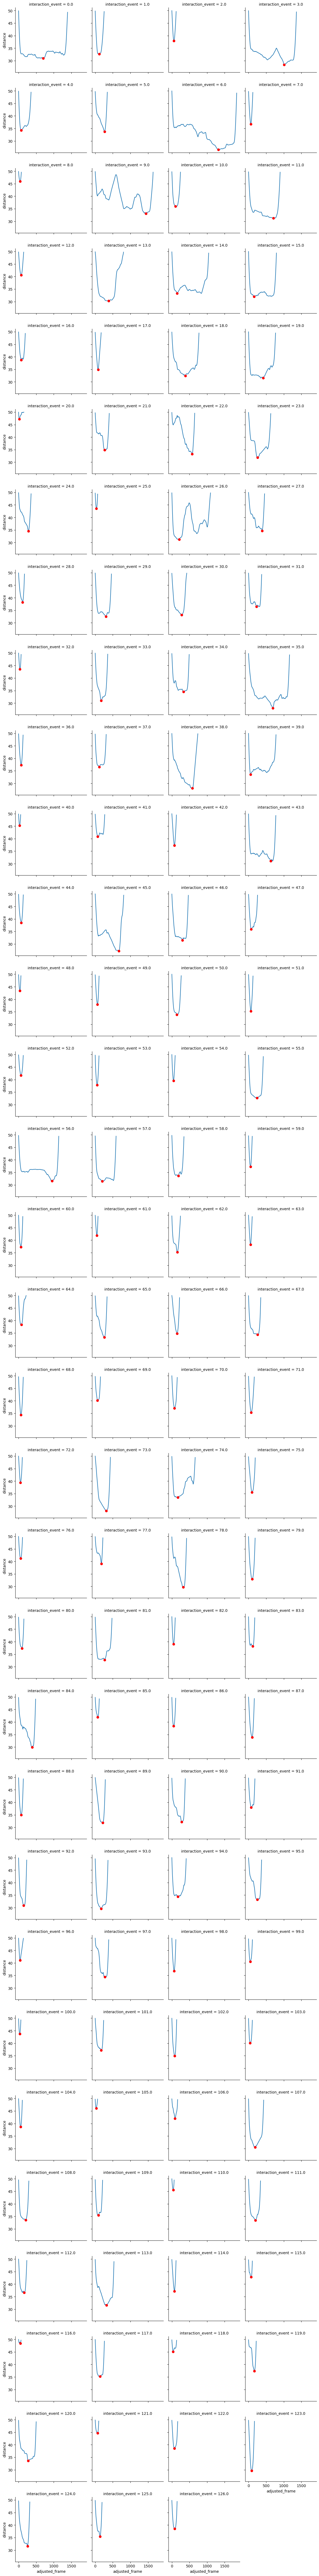

In [ ]:
# Filter out NaN values from interaction_event
exfly = exfly.dropna(subset=['interaction_event'])

# Rest of your preprocessing code...

# Find first minimum distance for each event
min_distance = exfly.groupby("interaction_event")["distance"].idxmin()

# Create a grid
grid = sns.FacetGrid(exfly, col="interaction_event", col_wrap=4)

# Plot the distance for each event
grid.map(plt.plot, "adjusted_frame", "distance")

# Add markers for the minimum distance points
for ax, event in zip(grid.axes.flat, exfly["interaction_event"].unique()):
    try:
        min_idx = min_distance[event]
        min_point = exfly.loc[min_idx]
        ax.plot(min_point["adjusted_frame"], min_point["distance"], 'ro')
    except KeyError:
        print(f"Warning: No minimum distance found for event {event}")

# Save the plot
plt.savefig("/mnt/upramdya_data/MD/MultiMazeRecorder/Plots/250218_Refined_contacts/events_distance_withmarkers_shortevents.png")
plt.show()



In [ ]:
type(exfly["interaction_event"].unique())

numpy.ndarray

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

def find_interaction_start(data, distance_col, frame_col, 
                          threshold_multiplier=1.5, window_size=30, 
                          min_plateau_length=50, peak_prominence=1.5,
                          peak_window_size=10):
    # Work on a copy to avoid modifying original data
    data = data.copy()
    
    # Smoothing and derivative calculation
    data['smoothed_distance'] = savgol_filter(data[distance_col], 
                                            window_length=11, 
                                            polyorder=3)
    data['smoothed_diff'] = data['smoothed_distance'].diff()
    data['smoothed_accel'] = data['smoothed_diff'].diff()  # Second derivative

    # Dynamic threshold for plateaus based on rolling standard deviation
    rolling_std = data['smoothed_diff'].rolling(window=window_size).std()
    dynamic_threshold = rolling_std.mean() * threshold_multiplier  # Adjust multiplier as needed

    # Plateau detection with dynamic threshold
    plateau_mask = (data['smoothed_diff'].abs() < dynamic_threshold)
    plateau_groups = (plateau_mask != plateau_mask.shift()).cumsum()
    
    # Initialize plateau markers
    data['plateau_start'] = 0
    valid_plateaus = data[plateau_mask].groupby(plateau_groups).filter(
        lambda x: len(x) >= min_plateau_length
    )
    if not valid_plateaus.empty:
        start_indices = valid_plateaus.groupby(plateau_groups).head(1).index
        data.loc[start_indices, 'plateau_start'] = 1

    # Peak detection with stricter prominence
    peaks, _ = find_peaks(-data['smoothed_distance'],
                        prominence=peak_prominence,
                        width=3)
    
    # Refine peak detection for better alignment
    refined_peaks = []
    for peak in peaks:
        if peak > 0 and peak < len(data) - 1:
            # Perform local search around the detected peak to refine position
            local_region = data.iloc[max(0, peak - peak_window_size):min(len(data), peak + peak_window_size)]
            true_peak_idx = local_region[distance_col].idxmin()  # Find true minimum in this region
            refined_peaks.append(true_peak_idx)

    # Combine plateau and refined peak detections
    plateau_indices = data[data['plateau_start'] == 1].index
    all_candidates = sorted(list(plateau_indices) + refined_peaks)
    
    # Fallback to minimum distance if no markers found
    if not all_candidates:
        return data[distance_col].idxmin()
    
    return all_candidates[0]

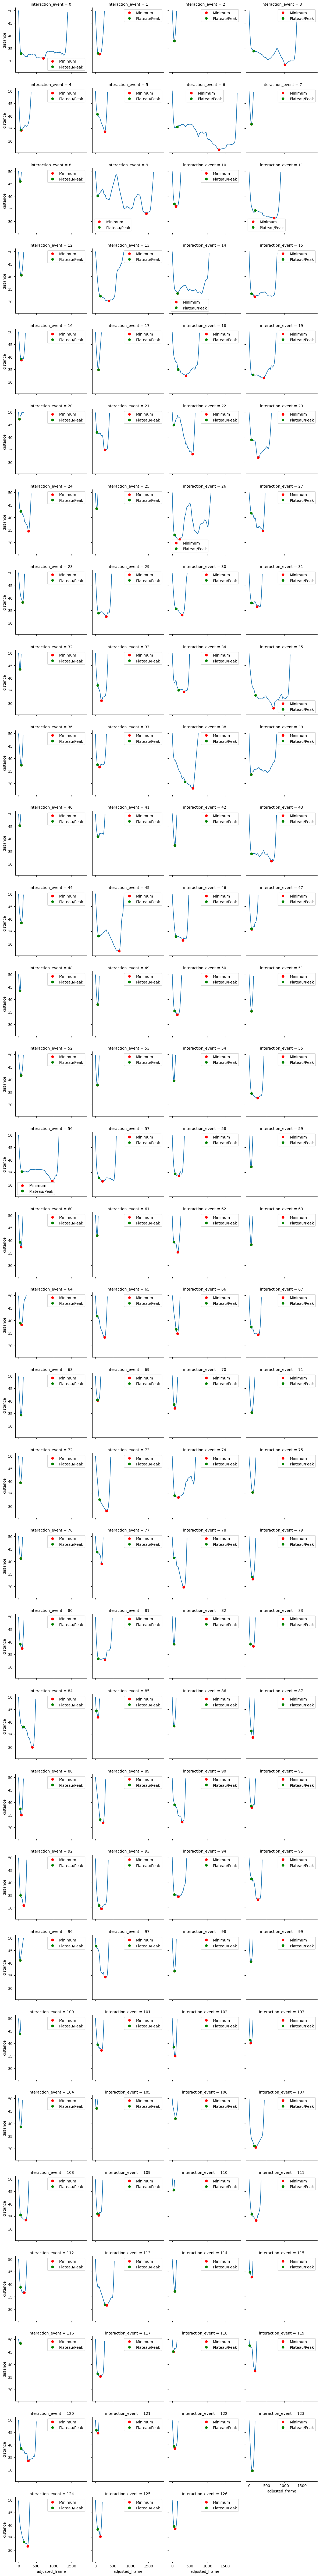

In [ ]:

# Convert interaction_event to integer sequence first
exfly['interaction_event'] = exfly['interaction_event'].astype(int)

# Filter out NaN values from interaction_event
exfly = exfly.dropna(subset=['interaction_event'])

# Find first minimum distance and plateau/peak for each event
min_distance = exfly.groupby("interaction_event")["distance"].idxmin()
plateau_or_peak = exfly.groupby("interaction_event").apply(
    lambda x: find_interaction_start(x, 'distance', 'adjusted_frame',
                                    window_size=50,)
)

# Create a grid
grid = sns.FacetGrid(exfly, col="interaction_event", col_wrap=4)

# Plot the distance for each event
grid.map(plt.plot, "adjusted_frame", "distance")

# Add markers for the minimum distance points and plateau/peak points
for ax, event in zip(grid.axes.flat, exfly["interaction_event"].unique()):
    try:
        # Plot minimum distance point
        min_idx = min_distance[event]
        min_point = exfly.loc[min_idx]
        ax.plot(min_point["adjusted_frame"], min_point["distance"], 'ro', label='Minimum')
        
        # Plot plateau/peak point
        plateau_peak_idx = plateau_or_peak[event]
        plateau_peak_point = exfly.loc[plateau_peak_idx]
        ax.plot(plateau_peak_point["adjusted_frame"], plateau_peak_point["distance"], 'go', label='Plateau/Peak')
        #ax.set_xlim(plateau_peak_point["adjusted_frame"] - 20, plateau_peak_point["adjusted_frame"] + 20)
        
        ax.legend()
    except KeyError:
        print(f"Warning: No data found for event {event}")

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("/mnt/upramdya_data/MD/MultiMazeRecorder/Plots/250218_Refined_contacts/events_distance_withmarkers_and_plateaus.png")
plt.show()


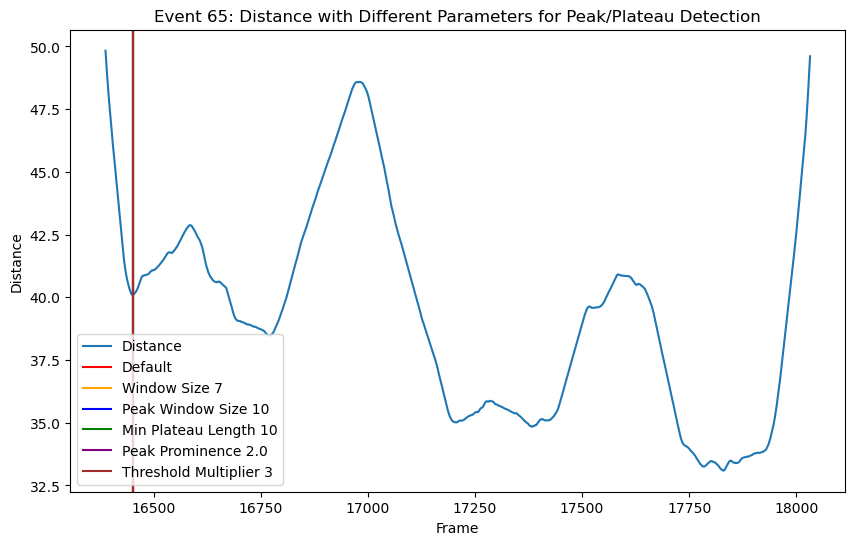

In [132]:
# Select event 65 and try different parameters for peak / plateau detection
event_data = exfly.loc[exfly["interaction_event"] == 9]

# Create a single plot
plt.figure(figsize=(10, 6))
plt.plot(event_data["frame"], event_data["distance"], label='Distance')

# Try different parameters for peak / plateau detection

# Default parameters
start_idx = find_interaction_start(event_data, 'distance', 'frame')
plt.axvline(event_data.loc[start_idx, 'frame'], color='r', label='Default')

# Increase window size
start_idx = find_interaction_start(event_data, 'distance', 'frame', window_size=50)
plt.axvline(event_data.loc[start_idx, 'frame'], color='orange', label='Window Size 7')

# Change peak window size

start_idx = find_interaction_start(event_data, 'distance', 'frame', peak_window_size=10)
plt.axvline(event_data.loc[start_idx, 'frame'], color='blue', label='Peak Window Size 10')

# Increase minimum plateau length
start_idx = find_interaction_start(event_data, 'distance', 'frame', min_plateau_length=40)
plt.axvline(event_data.loc[start_idx, 'frame'], color='green', label='Min Plateau Length 10')

# Increase peak prominence
start_idx = find_interaction_start(event_data, 'distance', 'frame', peak_prominence=1)
plt.axvline(event_data.loc[start_idx, 'frame'], color='purple', label='Peak Prominence 2.0')

# Increase dynamic threshold multiplier
start_idx = find_interaction_start(event_data, 'distance', 'frame', threshold_multiplier=3)
plt.axvline(event_data.loc[start_idx, 'frame'], color='brown', label='Threshold Multiplier 3')

# Add legend and show plot
plt.legend()
plt.xlabel('Frame')
plt.ylabel('Distance')
plt.title('Event 65: Distance with Different Parameters for Peak/Plateau Detection')
plt.show()

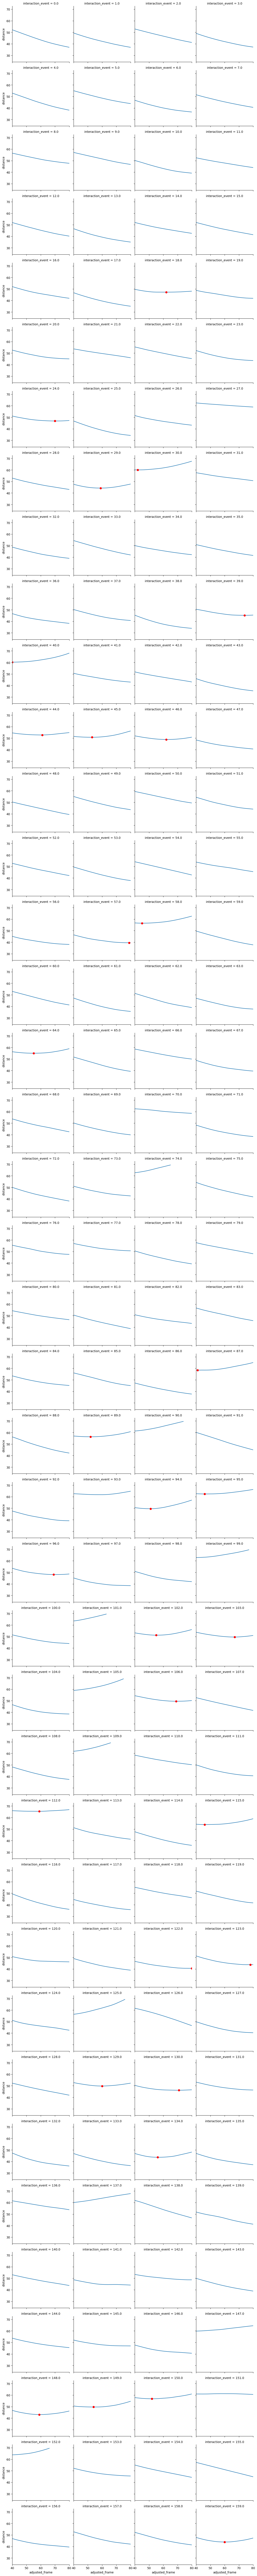

In [41]:
# Now let's crop the interaction events to 20 frames before and after the minimum distance point and plot the grid again

# Create a grid

grid = sns.FacetGrid(exfly, col="interaction_event", col_wrap=4)

# Plot the distance for each event

grid.map(plt.plot, "adjusted_frame", "distance")

# Add markers for the minimum distance points

for ax, event in zip(grid.axes.flat, exfly["interaction_event"].unique()):
    
    try:
        min_idx = min_distance[event]
        min_point = exfly.loc[min_idx]
        ax.plot(min_point["adjusted_frame"], min_point["distance"], 'ro')
        ax.set_xlim(min_point["adjusted_frame"] - 20, min_point["adjusted_frame"] + 20)
    except KeyError:
        print(f"Warning: No minimum distance found for event {event}")
        
# Save the plot

plt.savefig("/mnt/upramdya_data/MD/MultiMazeRecorder/Plots/250218_Refined_contacts/events_distance_withmarkers_cropped.png")

plt.show()

In [15]:
# Load contact data 

Contact_data = Ballpushing_utils.Dataset(exp, dataset_type="contact_data")

Config loaded with the following parameters:
time_range: None
success_cutoff: False
success_cutoff_method: final_event
tracks_smoothing: True
downsampling_factor: None
interaction_threshold: (0, 70)
gap_between_events: 4
events_min_length: 2
dead_threshold: 30
adjusted_events_normalisation: 1000
significant_threshold: 5
aha_moment_threshold: 20
success_direction_threshold: 25
final_event_threshold: 170
final_event_F1_threshold: 100
max_event_threshold: 10
template_width: 96
template_height: 516
padding: 20
y_crop: (74, 0)
contact_threshold: (0, 13)
gap_between_contacts: 0.5
contact_min_length: 0.5
skeleton_tracks_smoothing: False
hidden_value: -1


In [16]:
Contact_data.data

index   frame         time  object     x_Head      y_Head   x_Thorax  \
0           0    2872    95.733333  ball_1  60.236374  276.418549  60.026958   
1           1    2873    95.766667  ball_1  60.317257  276.364105  60.119576   
2           2    2874    95.800000  ball_1  60.385010  276.100739  60.026653   
3           3    2875    95.833333  ball_1  60.441734  276.024445  60.014194   
4           4    2876    95.866667  ball_1  60.416370  275.991058  60.053108   
...       ...     ...          ...     ...        ...         ...        ...   
799482   1316  199590  6653.000000  ball_1  72.108856  227.969009  72.073555   
799483   1317  199591  6653.033333  ball_1  72.268494  228.442566  71.967934   
799484   1318  199592  6653.066667  ball_1  75.581787  231.389160  72.159203   
799485   1319  199593  6653.100000  ball_1  75.848930  228.441971  72.246605   
799486   1320  199594  6653.133333  ball_1  75.746323  228.533188  72.266068   

          y_Thorax  x_Abdomen   y_Abdomen  ...  Nickname  Brain region  \
0       288.302185  72.327934  311.980591  ...        PR       Control   
1       288.220215  72.372093  311.876251  ...        PR       Control   
2       287.938263  72.169151  311.737213  ...        PR       Control   
3       287.834808  72.131027  311.831024  ...        PR       Control   
4       287.827240  72.173462  311.808807  ...        PR       Control   
...            ...        ...         ...  ...       ...           ...   
799482  239.866043  59.772671  259.839996  ...        PR       Control   
799483  240.294464  56.448719  259.921509  ...        PR       Control   
799484  240.486496  56.446896  259.879028  ...        PR       Control   
799485  240.397552  56.364487  259.786743  ...        PR       Control   
799486  243.521667  56.551559  260.127655  ...        PR       Control   

        Simplified Nickname  Split    Date  Genotype  Period     FeedingState  \
0                        PR      m  230704        PR      AM  starved_noWater   
1                        PR      m  230704        PR      AM  starved_noWater   
2                        PR      m  230704        PR      AM  starved_noWater   
3                        PR      m  230704        PR      AM  starved_noWater   
4                        PR      m  230704        PR      AM  starved_noWater   
...                     ...    ...     ...       ...     ...              ...   
799482                   PR      m  230704        PR      AM              Fed   
799483                   PR      m  230704        PR      AM              Fed   
799484                   PR      m  230704        PR      AM              Fed   
799485                   PR      m  230704        PR      AM              Fed   
799486                   PR      m  230704        PR      AM              Fed   

        Orientation  Light  
0               std     on  
1               std     on  
2               std     on  
3               std     on  
4               std     on  
...             ...    ...  
799482          std     on  
799483          std     on  
799484          std     on  
799485          std     on  
799486          std     on  

[799487 rows x 44 columns]

In [17]:
Contact_data.data.columns

Index(['index', 'frame', 'time', 'object', 'x_Head', 'y_Head', 'x_Thorax',
       'y_Thorax', 'x_Abdomen', 'y_Abdomen', 'x_Rfront', 'y_Rfront',
       'x_Lfront', 'y_Lfront', 'x_Rmid', 'y_Rmid', 'x_Lmid', 'y_Lmid',
       'x_Rhind', 'y_Rhind', 'x_Lhind', 'y_Lhind', 'x_Rwing', 'y_Rwing',
       'x_Lwing', 'y_Lwing', 'contact_index', 'x_centre', 'y_centre',
       'x_centre_preprocessed', 'y_centre_preprocessed', 'fly', 'flypath',
       'experiment', 'Nickname', 'Brain region', 'Simplified Nickname',
       'Split', 'Date', 'Genotype', 'Period', 'FeedingState', 'Orientation',
       'Light'],
      dtype='object')

In [18]:
# Make a column with the distance between the fly and the ball

Contact_data.data["distance"] = np.sqrt(
    (Contact_data.data["x_centre_preprocessed"] - Contact_data.data["x_Thorax"]) ** 2
    + (Contact_data.data["y_centre_preprocessed"] - Contact_data.data["y_Thorax"]) ** 2
)

In [20]:
# Make a "adjusted_frame" column that starts at 0 and goes up to the length of the event. These should be computed grouped by contact_index

Contact_data.data["adjusted_frame"] = Contact_data.data.groupby("contact_index")["frame"].transform(
    lambda x: x - x.min()
)

In [21]:
# Plot a grid and for each event plot the curve of the distance between the fly and the ball during the event

# Create a grid

grid = sns.FacetGrid(Contact_data.data, col="contact_index", col_wrap=4)

# Plot the distance for each event

grid.map(plt.plot, "adjusted_frame", "distance")
